| **Inicio** | **atrás 4** | **Siguiente 6** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./4_Bias_Variance_trade_off.ipynb)| [⏩](./6_Stacking.ipynb)|

# **5. Cross Validation**

![Cross Validation](../img/Cross%20Validation.jpg "Cross Validation")

La validación cruzada es una técnica utilizada en machine learning para evaluar el rendimiento de un modelo en un conjunto de datos. Su objetivo es proporcionar una estimación más robusta del rendimiento del modelo al entrenar y evaluar el modelo en múltiples subdivisiones del conjunto de datos.

**Terminología de Cross Validation:**

1. **Conjunto de Entrenamiento (Training Set):** El subconjunto del conjunto de datos utilizado para entrenar el modelo.

2. **Conjunto de Validación (Validation Set):** Un subconjunto separado del conjunto de datos utilizado para evaluar el rendimiento del modelo durante el entrenamiento. No se utiliza en el proceso de entrenamiento del modelo.

3. **K-Fold Cross Validation:** Un enfoque común de validación cruzada que divide el conjunto de datos en K pliegues (folds). El modelo se entrena y evalúa K veces, utilizando un pliegue diferente como conjunto de validación en cada iteración.

**Fórmula Matemática de Cross Validation:**

El error de validación cruzada se calcula tomando el promedio de los errores obtenidos en cada iteración:

$\text{Error de Validación Cruzada} = \frac{1}{K} \sum_{i=1}^{K} \text{Error}(i)$

donde:

* $\text{Error}(i)$ es el error en la iteración $(i)$

* $(K)$ es el número total de pliegues.

**Ejemplo con Gráficos en Python:**

Vamos a utilizar la biblioteca scikit-learn para implementar la validación cruzada K-Fold y visualizar el rendimiento del modelo.

Resultados de Cross Validation (Accuracy): [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Precisión Promedio: 0.9600000000000002


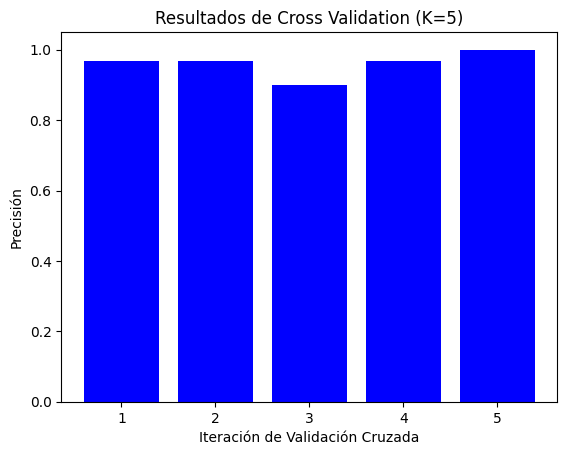

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Aplicar K-Fold Cross Validation con K=5
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Visualizar los resultados
print("Resultados de Cross Validation (Accuracy):", cv_scores)
print("Precisión Promedio:", cv_scores.mean())

# Visualizar un gráfico de barras con los resultados
import matplotlib.pyplot as plt

plt.bar(range(1, 6), cv_scores, color='blue')
plt.xlabel('Iteración de Validación Cruzada')
plt.ylabel('Precisión')
plt.title('Resultados de Cross Validation (K=5)')
plt.show()

En este ejemplo, utilizamos un clasificador de árbol de decisión y aplicamos K-Fold Cross Validation con \(K=5\) pliegues. Los resultados, que representan la precisión del modelo en cada pliegue, se imprimen y se visualizan en un gráfico de barras. La precisión promedio nos da una estimación general del rendimiento del modelo en todo el conjunto de datos.

### **Ejemplo**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Crear un DataFrame sintético
data = {'X1': np.random.randn(100),
        'X2': np.random.randn(100),
        'Y': 2 * np.random.randn(100) + 3}
df = pd.DataFrame(data)
df

,X1,X2,Y
0,0.802011,0.379358,1.998170
1,0.781176,-0.755344,1.067982
2,0.544163,-0.303154,4.232437
3,2.764090,-0.367636,5.536588
4,-0.941308,-0.372454,3.562723
...,...,...,...
95,-1.183603,-1.942375,1.687141
96,-0.236908,0.365731,6.970853
97,-0.252106,1.376886,6.167897
98,0.909680,1.367285,4.142687


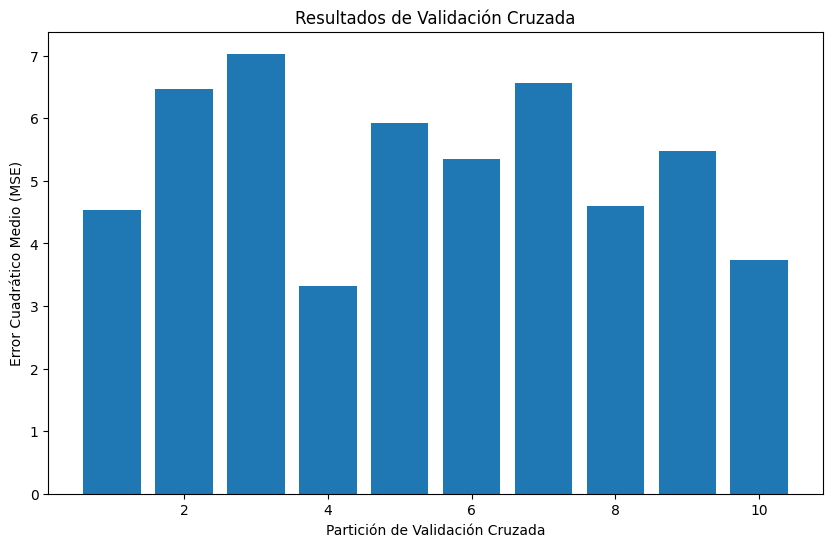

In [5]:
# Separar las características (X) y las etiquetas (Y)
X = df[['X1', 'X2']]
y = df['Y']

# Inicializar el modelo de regresión (puedes cambiarlo según tu problema)
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Realizar validación cruzada con KFold (10 particiones en este ejemplo)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calcular las puntuaciones de la validación cruzada
cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Visualizar las puntuaciones
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cross_val_scores) + 1), -cross_val_scores)
plt.xlabel('Partición de Validación Cruzada')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Resultados de Validación Cruzada')
plt.show()

| **Inicio** | **atrás 4** | **Siguiente 6** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./4_Bias_Variance_trade_off.ipynb)| [⏩](./6_Stacking.ipynb)|